In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import iSDR_cython as ciSDR
np.random.seed(12)

# Example 1: iSDR order 1

In [2]:
n_t = 150
n_c, n_s = 3,3
np.random.seed(40)
G = np.abs(np.random.normal(0,1,(n_c, n_s)))
J = np.zeros((n_s, n_t))
J[:, 0] = [10, 0.1, 0]
A = np.array([[0.9,-0.4,0], [0.25, 0.97,0],[0,0,0]])
for i in range(J.shape[-1]-1):
    J[:, i+1] = np.dot(A, J[:, i])
m_p = 1
M = np.dot(G, J[:, m_p:])
SC = np.array([[1,1,0], [1,1,0],[0,0,1]])


In [3]:
cl = ciSDR.linear_model.iSDR(l21_ratio=1e-1, tol=1e-12, max_iter=10000)
cl.solver(G, M, SC, 1, A=A)
R = cl.coef_

Iteration 0
IDX  2 [3.53098217 2.75387896 0.        ]
(438, 4) (3, 149)
[[ 0.71039558 -0.74914459]
 [ 0.46752017  0.84198371]]


/home/bbelaouc/Wokspace/iSDR_cython/src/iSDR_cython/linear_model.py:127: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(G, y[:, 2*model_p + 1:].reshape(-1, order='F'))
/home/bbelaouc/Wokspace/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


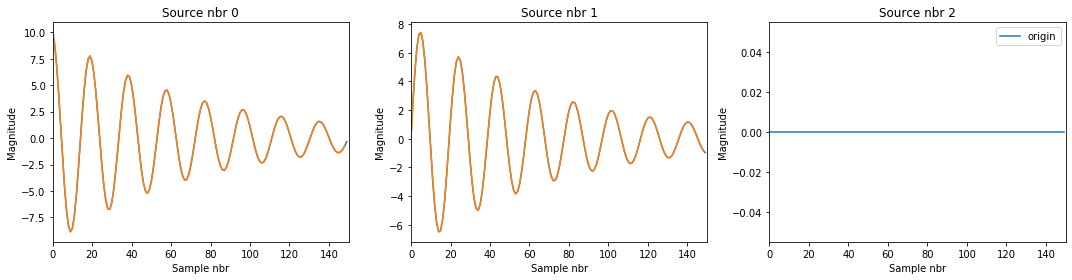

In [4]:
plt.figure(figsize=(15,4))
for i in range(n_s):
    plt.subplot(1,n_s, i+1)
    plt.plot(J[i, :], label='origin')
    if i < R.shape[0]:
        plt.plot(R[i, :], label='reconstructed')
    plt.title('Source nbr %s'%i)
    plt.xlim(0, J.shape[1])
    plt.xlabel('Sample nbr')
    plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()

# Example 2: iSDR order 2

In [5]:
G_2 = np.zeros((n_c, n_s*2))
G_2[:, n_s:] = np.dot(G, A)
cl = ciSDR.linear_model.iSDR(l21_ratio=1e-10, la=1e-2, tol=1e-12, max_iter=10000)
m_p = 3
Atmp = np.zeros((n_s, n_s*m_p))
Atmp[:, -n_s:] = np.eye(n_s)
cl.solver(G, M, SC, nbr_iter=10, model_p=m_p, A=Atmp, method='lasso')
R = cl.coef_

Iteration 0
IDX  2 [3.41274544 2.74066023 0.        ]
(426, 12) (3, 149)
[[ 0.29695689 -0.90772946  0.11522819 -0.          0.07262679 -0.        ]
 [ 0.49178845  0.23257387  0.          0.27920697  0.          0.14647487]]
Iteration 1
IDX  2 [3.67486441 2.78252452]
2 2 2 3


/home/bbelaouc/Wokspace/iSDR_cython/src/iSDR_cython/linear_model.py:94: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37435953836490415, tolerance: 1.499556466714007e-08
  check_random_state(self.random_state), random)
/home/bbelaouc/Wokspace/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.160467237551232, tolerance: 1.2552767155375228
  positive)


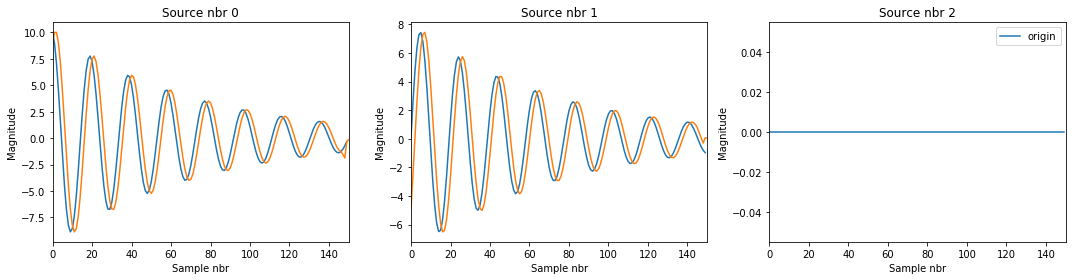

In [6]:
plt.figure(figsize=(15,4))
for i in range(n_s):
    plt.subplot(1,n_s, i+1)
    plt.plot(J[i, :], label='origin')
    if i < R.shape[0]:
        plt.plot(R[i, :], label='reconstructed')
    plt.title('Source nbr %s'%i)
    plt.xlim(0, J.shape[1])
    plt.xlabel('Sample nbr')
    plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()

In [7]:
for i in range(m_p, n_t):
    R[:, i] = 0
    x = R.shape[0]
    for j in range(m_p):
        R[:, i] += np.dot(cl.Acoef_[:, j*x:(j+1)*x], R[:, i - m_p + j]) 

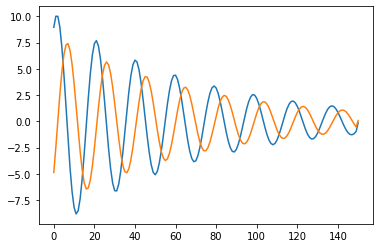

In [8]:
plt.plot(R.T)

In [9]:
cl.get_phi()

In [10]:
cl.eigs

,real,imag
eig,,
eig_0,0.934443,0.314253
eig_1,0.934443,-0.314253
eig_2,-0.734074,0.497810
eig_3,-0.734074,-0.497810
eig_4,-0.090818,0.816043
eig_5,-0.090818,-0.816043


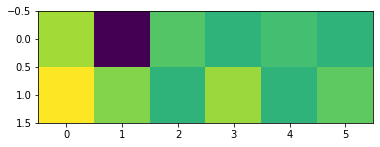

In [12]:
plt.imshow(cl.Acoef_)

In [ ]:
SC